In [60]:
import numpy as np
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("citation_2016.csv", index_col=0)
df

,cited_assignee,cited_publication_number,citing_publication_number,citing_assignee,cited_cpc_code,citing_cpc_code
0,CHRISTENSEN JACOB,US-2018260868-A1,US-2019130748-A1,MANDO CORP,G06Q30/06,G08G1/141
1,MAGIC LEAP INC,US-2017039613-A1,US-10489653-B2,CAPITAL ONE SERVICES LLC,G06Q30/06,G06F3/011
2,PANASONIC IP MAN CO LTD,US-2016267579-A1,EP-3537615-A1,KWANG YANG MOTOR CO,G06Q30/06,B60L53/30
3,ONETRUST LLC,US-9898769-B2,US-10585968-B2,ONETRUST LLC,G06Q30/06,G06F40/17
4,Markoff Jon Edward,US-2018101894-A1,US-10417797-B2,METRICSTREAM INC,G06Q30/06,G06T11/20
...,...,...,...,...,...,...
5987,ONETRUST LLC,US-9892443-B2,US-10284604-B2,ONETRUST LLC,G06Q30/06,H04L63/20
5988,ONETRUST LLC,US-9892442-B2,US-10165011-B2,ONETRUST LLC,G06Q30/06,H04L63/20
5989,ONETRUST LLC,US-9898769-B2,US-10567439-B2,ONETRUST LLC,G06Q30/06,H04L63/20
5990,ONETRUST LLC,US-9691090-B1,US-10348775-B2,ONETRUST LLC,G06Q30/06,H04L63/20


In [45]:
all_assignees = list(set(list(df.cited_assignee) + list(df.citing_assignee)))

d = {name: i for i,name in enumerate(all_assignees)}

In [63]:
len(d)

2197

In [52]:
df = df.applymap(lambda s: d.get(s) if s in d else s)

In [54]:
D = nx.DiGraph()
for index, row in df.iterrows():
    D.add_edge(row["citing_assignee"], row["cited_assignee"])

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  from matplotlib.collections import LineCollection
/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if len(arrow_colors) == len(edge_pos):


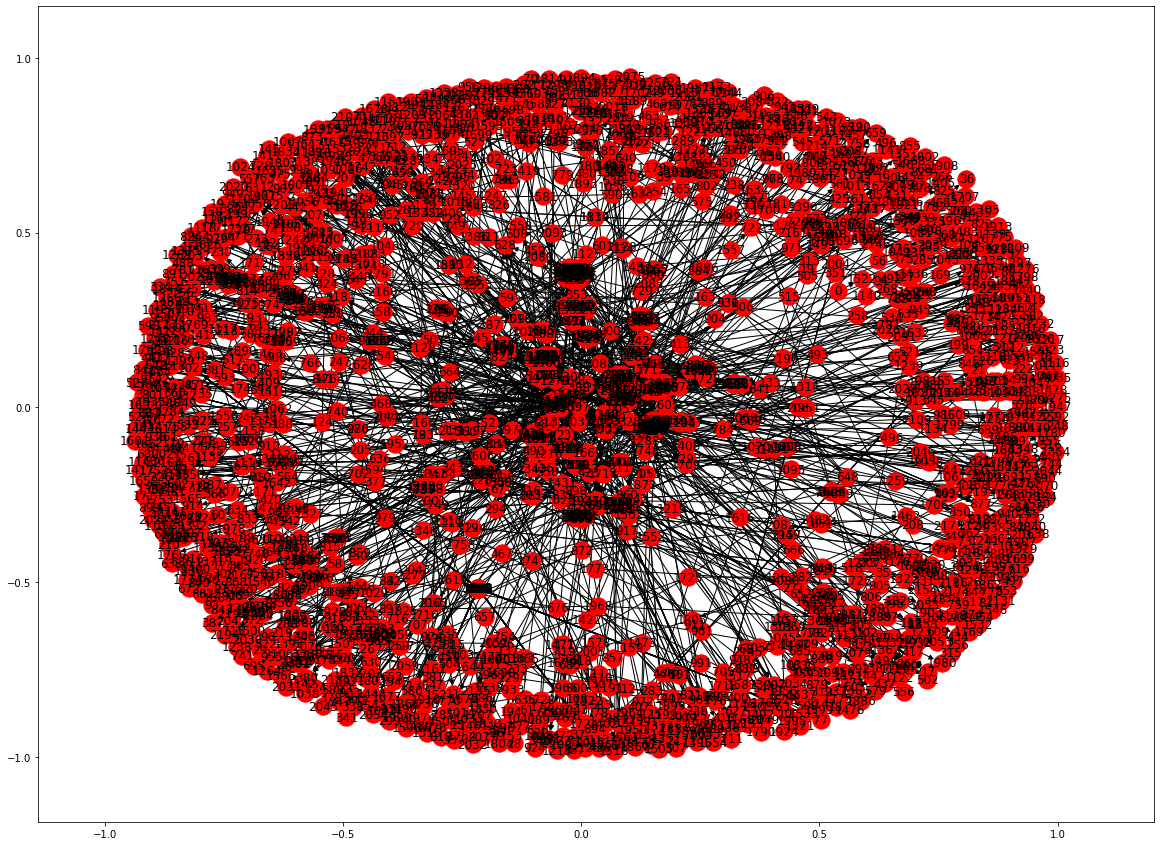

In [61]:
plt.figure(figsize=(20,15))
nx.draw_networkx(D, pos=nx.spring_layout(D))

In [58]:
nx.to_pandas_edgelist(D)

,source,target
0,1942,1687
1,1942,399
2,1942,76
3,1687,1429
4,1687,919
...,...,...
2653,2087,2087
2654,1964,1867
2655,1607,2002
2656,2104,1934
